In [1]:
!pip install tweepy

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
auth = tweepy.OAuthHandler("7YWwchZ5FJSaSkUqGh1dcqRPd", "sMIrTG99VAu7IhpIE6GeNxAfVZrGJgUyv9QOr7lGzTvHUvV2Fv")
auth.set_access_token("1155160241358721024-M0Ps3SBjKSjMHjK5SJDbddxQsDMaao", "KguQcFIY4ESvTo285izomSI2eOpfuNJUKEpmO3Mni0F8r")
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
tweets = api.search(q="edx",count=100,lang="en",since="2020-11-01")
for item in tweets:
    print(item.text)

RT @MudpieFridays: Gifted - ADVENT #GIVEAWAY DAY 2 - Todays #adventgiveaway is with @edxeducation 
 you can #win EDX Education Junior Rainb…
RT @MineralsCouncil: The new Foundations of Modern Mining Program developed by the University of Queensland and @CurtinUni &amp; sponsored by t…
RT @MudpieFridays: Gifted - ADVENT #GIVEAWAY DAY 2 - Todays #adventgiveaway is with @edxeducation 
 you can #win EDX Education Junior Rainb…
RT @malwareunicorn: Downloading Xcode is like waiting for Call of Duty to finish updating.
Instruction 1845722: "mov ecx, edx"
 #OneSecondTweeted
RT @MudpieFridays: Gifted - ADVENT #GIVEAWAY DAY 2 - Todays #adventgiveaway is with @edxeducation 
 you can #win EDX Education Junior Rainb…
Instruction 1845721: "cmp edx, esi"
 #OneSecondTweeted
RT @MudpieFridays: Gifted - ADVENT #GIVEAWAY DAY 2 - Todays #adventgiveaway is with @edxeducation 
 you can #win EDX Education Junior Rainb…
Instruction 1845715: "mov edx, dword ptr [ebp+0xc]"
 #OneSecondTweeted
@sekerlicay01 @Eric

In [5]:
df =pd.DataFrame([item.text for item in tweets], columns=['Tweets'])

In [6]:
#cleaning the data
def cleanTxt(text):
    text = re.sub(r'@[A-za-z0-9]+', '', text)
    text = re.sub(r'#', '',text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?\/\/\S+', '', text)
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,: Gifted - ADVENT GIVEAWAY DAY 2 - Todays adve...
1,: The new Foundations of Modern Mining Program...
2,: Gifted - ADVENT GIVEAWAY DAY 2 - Todays adve...
3,: Downloading Xcode is like waiting for Call o...
4,"Instruction 1845722: ""mov ecx, edx""\n OneSecon..."
...,...
95,Now playing Enjoli - Thinking [EDx] on Wutz Ho...
96,Harvard edX on-line info science software FAQ:...
97,"Instruction 1845084: ""lea edx, ptr [eax+ecx*2]..."
98,I'm taking Supply Chain Analytics online with ...


In [7]:


#Sujectivity
def getsubjectivity(string):
    return TextBlob(string).sentiment.subjectivity

#Polarity
def getpolarity(string):
    return TextBlob(string).sentiment.polarity

#Add subjectivity and poloarity to data frame 
df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] =df['Tweets'].apply(getpolarity)
df

,Tweets,Subjectivity,Polarity
0,: Gifted - ADVENT GIVEAWAY DAY 2 - Todays adve...,0.700000,0.650000
1,: The new Foundations of Modern Mining Program...,0.351515,0.145455
2,: Gifted - ADVENT GIVEAWAY DAY 2 - Todays adve...,0.700000,0.650000
3,: Downloading Xcode is like waiting for Call o...,0.000000,0.000000
4,"Instruction 1845722: ""mov ecx, edx""\n OneSecon...",0.000000,0.000000
...,...,...,...
95,Now playing Enjoli - Thinking [EDx] on Wutz Ho...,0.000000,0.000000
96,Harvard edX on-line info science software FAQ:...,0.000000,0.000000
97,"Instruction 1845084: ""lea edx, ptr [eax+ecx*2]...",0.000000,0.000000
98,I'm taking Supply Chain Analytics online with ...,0.000000,0.000000


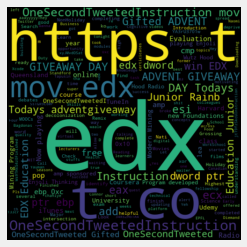

In [8]:
#Plotting WordCloud 
allwords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=500, random_state =21, max_font_size=200).generate(allwords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [9]:
#Positive, Negative, Neutral 
def getAnalysis(points):
    if points < 0:
        return 'Negative'
    elif points == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
#Add analysis to the dataframe 
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,: Gifted - ADVENT GIVEAWAY DAY 2 - Todays adve...,0.700000,0.650000,Positive
1,: The new Foundations of Modern Mining Program...,0.351515,0.145455,Positive
2,: Gifted - ADVENT GIVEAWAY DAY 2 - Todays adve...,0.700000,0.650000,Positive
3,: Downloading Xcode is like waiting for Call o...,0.000000,0.000000,Neutral
4,"Instruction 1845722: ""mov ecx, edx""\n OneSecon...",0.000000,0.000000,Neutral
...,...,...,...,...
95,Now playing Enjoli - Thinking [EDx] on Wutz Ho...,0.000000,0.000000,Neutral
96,Harvard edX on-line info science software FAQ:...,0.000000,0.000000,Neutral
97,"Instruction 1845084: ""lea edx, ptr [eax+ecx*2]...",0.000000,0.000000,Neutral
98,I'm taking Supply Chain Analytics online with ...,0.000000,0.000000,Neutral


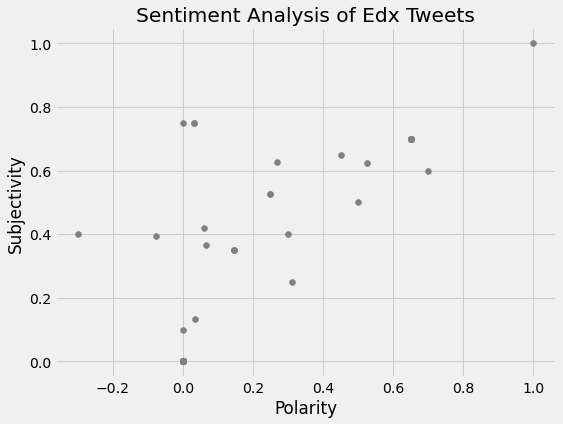

In [10]:
#Plot polarity against subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Grey')
    
plt.title('Sentiment Analysis of Edx Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [11]:
#percentage of positive tweets 
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

27.0

In [12]:
#percentage of negative tweets 
ngtweets = df[df.Analysis == 'Negative']
ngtweets = ngtweets['Tweets']

round((ngtweets.shape[0] / df.shape[0]) * 100, 1)

2.0

In [13]:
#percentage of neutral tweets 
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

71.0

In [14]:
df['Analysis'].value_counts()

Neutral     71
Positive    27
Negative     2
Name: Analysis, dtype: int64

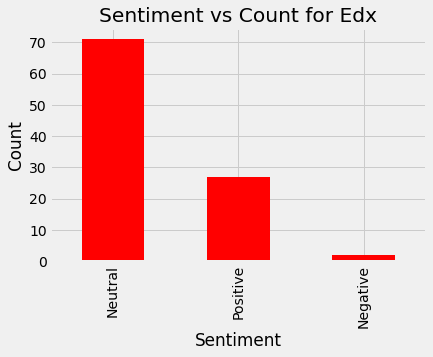

In [15]:
#Plotting the counts 
plt.title('Sentiment vs Count for Edx')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar', color='Red')
plt.show()

In [16]:
df.to_csv(r'Edx Tweets.csv', index=False)